#  Tarea 02. Sobre visualización, integrales y derivadas numéricas

Para estos ejercicios necesitarás importar `numpy` y `matplotlib.pyplot`. Si no recuerdas como se hace, checa tus notebooks y apuntes.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Ejercicio 1

i) Deduce la fórmula para el valor de $\int_{x_{i-1}}^{x_{i}} f(s) \; ds$ cuando aproximamos la función como una recta. Es decir, da la fórmula para el área del trapecio en un intervalo $[x_{i-1},x_{i}]$ de la figura anterior. La fórmula solo debe depender de $x_{i-1},f(x_{i-1}), x_{i},f(x_{i})$ 

<div>
<img src="https://mathlake.com/uploads/images/1c7959f2e222b606eeb6fa0508a2f4a2.svg" width="500"/>
</div>

ii) Implementa la regla anterior en una función que tome como argumento una función `f`, los lḿites de integración `a` y `b` y el número de intervalos usados (el número de trapecios) `n`. Recuerda que si partes un intervalo $[a,b]$ en $n$ subintervalos esto genera $n+1$ puntos con $x_0=a$ y $x_{n+1}=b$.  

iii) Prueba tu función para la integral del 
$$f(x) = \cos(x+\pi) + 1$$
en el intervalo, $[0, 2\pi]$ y unos cuantos valores de `n`. Compara con el resultado analítico.

## Solución

I) Recordemos que la ecuación de una línea recta se puede escribir como:

$$y=mx+b$$

donde $m$ es la pendiente y $b$ la ordenada al origen, entonces obtenemos la pendiente

$$m=\frac{f(x_i)-f(x_{i-1})}{x_{i}-x_{i-1}}$$

Para obtener la ordenada al origen se sustituye lo anterior con el punto $(x_i, f(x_i))$ y se tiene que

$$f(x_i)=\frac{f(x_{i})-f(x_{i-1})}{x_{i}-x_{i-1}}x_i+b$$
$$ \Rightarrow b=f(x_i)-\frac{f(x_{i})-f(x_{i-1})}{x_{i}-x_{i-1}}x_i $$

por tanto

$$f(x)= \frac{f(x_{i})-f(x_{i-1})}{x_{i}-x_{i-1}}x+f(x_i)-\frac{f(x_{i})-f(x_{i-1})}{x_{i}-x_{i-1}}x_i $$
$$ \Rightarrow f(x)= \frac{f(x_{i})-f(x_{i-1})}{x_{i}-x_{i-1}}(x-x_i) +f(x_i)$$

Después para obtener el área del trapecio se integra el resultado anterior

$$\int_{x_i-1}^{x_i} \frac{f(x_{i})-f(x_{i-1})}{x_{i}-x_{i-1}}(x-x_i)+f(x_i) \: dx = \int_{x_i-1}^{x_i} \frac{f(x_{i})-f(x_{i-1})}{x_{i}-x_{i-1}}x  \: dx - \int_{x_i-1}^{x_i} \frac{f(x_{i})-f(x_{i-1})}{x_{i}-x_{i-1}}x_i + \int_{x_i-1}^{x_i} f(x_i)  \: dx =$$

$$  \frac{f(x_{i})-f(x_{i-1})}{x_{i-1}-x_{i}} \int_{x_i-1}^{x_i}x  \: dx - \frac{f(x_{i})-f(x_{i-1})}{x_{i-1}-x_{i}}x_i \int_{x_i-1}^{xi}\: dx + f(x_i) \int_{x_i-1}^{x_i}  \: dx =$$

$$  \frac{f(x_{i})-f(x_{i-1})}{x_{i}-x_{i-1}} \frac{1}{2}(x_i^2-x_{i-1}^2) - \frac{f(x_{i})-f(x_{i-1})}{x_{i}-x_{i-1}}x_i (x_i-x_{i-1}) + f(x_i)(x_{i}-x_{i-1}) =$$

$$  \frac{f(x_{i})-f(x_{i-1})}{x_{i}-x_{i-1}} \left(\frac{1}{2}(x_i^2-x_{i-1}^2) - x_i^2+x_ix_{i-1}\right) + f(x_i)(x_{i}-x_{i-1}) =$$

$$  \frac{f(x_{i})-f(x_{i-1})}{x_{i}-x_{i-1}} \left(\frac{1}{2}(x_i^2-x_{i-1}^2- 2x_i^2+2x_ix_{i-1})\right) + f(x_i)(x_{i}-x_{i-1}) =$$

$$  -\frac{1}{2}\frac{f(x_{i})-f(x_{i-1})}{x_{i}-x_{i-1}} (x_{i}-x_{i-1})^2 + f(x_i)(x_{i}-x_{i-1}) = -\frac{1}{2}\left(f(x_{i})-f(x_{i-1})\right)(x_{i}-x_{i-1}) + f(x_i)(x_{i}-x_{i-1}) =$$

$$  -\frac{(x_{i}-x_{i-1})}{2}\left(f(x_{i})-f(x_{i-1}) - 2f(x_i)\right) = -\frac{(x_{i}-x_{i-1})}{2}\left(-f(x_{i-1})-f(x_i)\right) = (x_{i}-x_{i-1})\frac{f(x_{i-1})+f(x_i)}{2}$$

In [237]:
#II)

def areaTrapecio(f,a,b):
    return (b-a)*(f(a)+f(b))*(1/2)

def intTrapecio(f,a,b,n):
    xx = np.linspace(a,b,n+1)
    integral = 0
    for i in range(n):
        integral = integral + areaTrapecio(f,xx[i],xx[i+1])
    return integral

In [311]:
#III)

def f1(x):
    return np.cos(x+np.pi)+1

nn = [1,2,3,10,20,50,100,500,1000]

for i in nn:
    print("Para n=",i, "se obtuvo",intTrapecio(f1,0,2*np.pi,i))

Para n= 1 se obtuvo 0.0
Para n= 2 se obtuvo 6.283185307179586
Para n= 3 se obtuvo 6.283185307179586
Para n= 10 se obtuvo 6.283185307179586
Para n= 20 se obtuvo 6.283185307179586
Para n= 50 se obtuvo 6.283185307179588
Para n= 100 se obtuvo 6.283185307179586
Para n= 500 se obtuvo 6.283185307179587
Para n= 1000 se obtuvo 6.283185307179575


Mientras que el valor analítico es: 2π = 6.283185307179586...

#### Ejercicio 2

_Spoiler_: este problema ya lo han resuelto con papel y lápiz :o

i) Grafica en una sola figura los puntos $(P,V)$ dados por $(50,1)$, $(25,2)$, $(5.4288,5)$, $(10.8577,2.5)$, donde las unidades para $P$ son atm y para $V$ son L. Une además los puntos con lineas punteadas de manera que la lineas sigan las siguientes funciones:

- Entre 1 y 2: $P\cdot V = \mathrm{cte}$
- Entre 2 y 3: $P\cdot V^{5/3} = cte$
- Entre 3 y 4: $P\cdot V = \mathrm{cte}$
- Entre 4 y 1: $P\cdot V^{5/3} = cte$

ii) Encuentra el area encerrada por las cuatro líneas. Para ello usa la función que definiste en el ejercicio 1.  
**_Hint 1_**: El área bajo una curva es igual a la integral de esa curva.  
**_Hint 2_**: Piensen en como sumar (o restar) integrales para obtener solo el área contenida por las líneas.

iii) Este es un problema de termodinámica/fenomenos colectivos. Qué cantidad acabamos de calcular? Lo que gráficamos son cuatro procesos que conforman un ciclo. Cuál es el nombre de este ciclo y cómo se le llama a cada proceso que lo compone (de 1 a 2, de 2 a 3, etc.)?  
**_Hint_**: $P$ es presión y $V$ es volumen.

## Solución

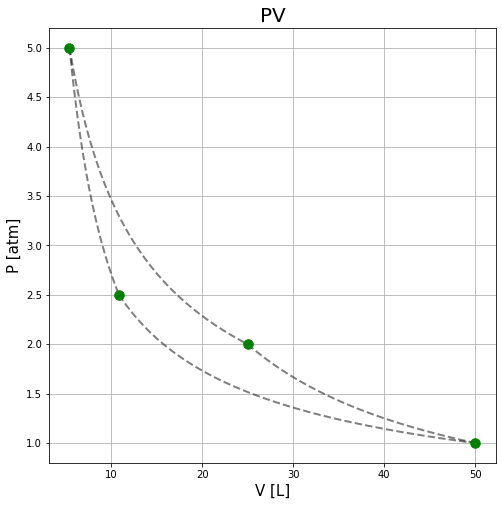

In [430]:
#I)

pp = [50,25,5.4288,10.8577]
vv = [1,2,5,2.5]

def ec1(x):
    return 50/x
xec1=np.linspace(25,50,100)


def ec2(x):
    return (79.37005/x)**(3/5)
xec2=np.linspace(5.4288,25,100)


def ec3(x):
    return 27.144/x
xec3=np.linspace(5.4288,10.8577,100)

def ec4(x):
    return (50/x)**(3/5)
xec4=np.linspace(10.8577,50,100)

plt.figure(figsize=(8,8))
plt.scatter(pp,vv, zorder=10,s=90,c="g")


plt.plot(xec1,ec1(xec1),ls="--",lw=2, c="k",alpha=0.5)
plt.plot(xec2,ec2(xec2),ls="--",lw=2, c="k",alpha=0.5)
plt.plot(xec3,ec3(xec3),ls="--",lw=2, c="k",alpha=0.5)
plt.plot(xec4,ec4(xec4),ls="--",lw=2, c="k",alpha=0.5)

plt.xlabel("V [L]",fontsize=15)
plt.ylabel("P [atm]",fontsize=15)
plt.title("PV",fontsize=20)
plt.grid(zorder=1)
plt.show()

In [429]:
#II)

int_1_2=intTrapecio(ec1,25,50,100)
int_2_3=intTrapecio(ec2,5.4288,25,100)
int_3_4=intTrapecio(ec3,5.4288,10.8577,100)
int_4_1=intTrapecio(ec4,10.8577,50,100)

area=int_1_2+int_2_3-int_3_4-int_4_1

print("El área encerrada por las cuatro líneas es:", area)

El área encerrada por las cuatro líneas es: 15.842713713037575


III)

El área encerrada corresponde al ***trabajo***. El proceso entre $1$ y $2$ es una **expansión adiabática**, el proceso entre $2$ y $3$ es una **expansión isotérmica**, el proceso entre $3$ y $4$ es una **comprensión adiabática** y el proceso entre $4$ y $1$ es una **comprensión isotérmica**.

#### Ejercicio 3

i) Usa cada uno de los tres métodos que aprendimos para calcular la derivada numérica para calcular la derivada de 

$$f(r) = 4\epsilon\left[\left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^6\right],$$

con $\sigma = 1$ y $\epsilon=4$

en el intervalo $[-.9,2]$. Para ello haz una gráfica como las de los ejercicios anteriores. Usa el mismo valor de `h` para cada método. Además, escoge un número adecuado de puntos (de $r$s) para que tu gráfica se vea bien.

ii) Haz una gráfica del error para cada método. Muestra las tres líneas en la misma figura.  

iii) Para cada método de los vistos en clase para cálcular la derivada numérica, haz una gráfica del error respecto al valor de $h$. Para ello calcula el error como el promedio del valor absoluto de la diferencia de tus valores calculados menos los analíticos en el dominio $[-.9,2]$.  
Deberás crear un arreglo de $h$s y calcular el error para cada $h$ de ese arreglo. Asegurate de crear el arreglo de $h$s espaciado logaritmicamente entre .0001 y .1 (puedes usar `np.logspace` para eso y checar cómo funciona leyendo su documentación).  
iv) Comenta sobre la tendencia del error. Para cuáles métodos es igual y para cuáles distinta? Cómo escala el error respecto a $h$ para cada caso (es decir, con qué orden)?

_______

# Problemas

En este notebook hay dos problemas. En realidad solo tienen que entregar uno. Si fueron estudiantes del curso de algoritmos computacionales conmigo y con Leo el semestre pasado, entonces tienen que hacer el Problema 1bis. En caso de que no hayas asistido al curso de algoritmos, puedes decidir hacer cualquiera de los dos.

### Tiro parabólico

Ya estamos en condiciones de poder visualizar sistemas *físicos* en la computadora.

#### Problema 1
(i) Define una función `trayectoria_t` que calcula la trayectoria de una partícula en tiro parabólico en 2 dimensiones con una posición $(x_0, y_0)$ y rapidez $v_0$ iniciales dadas y lanzado a un ángulo $\theta$ sobre la horizontal. `pos_t` debe tomar como argumentos una lista y tres valores, el primero con la posición inicial (que es un vector, i.e. un arrglo de dos entradas en este caso), el segundo con la rapidez inicial,  el tercero el ángulo $\theta$ y el cuarto un tiempo hasta el que se calcula la trayectoria. Lo que tu función debe regresar son dos arreglos, el primero con las coordenadas horizontales ($x(t)$) y el segundo con las coordenadas verticales ($x(t)$) para cada punto de la trayectoria.

Utiliza las fórmulas analíticas conocidas para ello.

$$\begin{align}
x(t) &= x_0 + v_{x0}t\\
y(t) &= y_0 + v_{y0}t - \frac{1}{2}gt^2\\
\end{align}$$

**Sugerencia 1:** Tendrás que definir dentro de tu función un arreglo con los tiempos en los que calcularas las posiciones, esto puedes hacerlo usando `np.linspace(0,t,<número de tiempos a calcular>`. Ten cuidado con usar suficientes puntos para que la gráfica sea suave.

**Sugerencia 2:** Deberás usar las funciones `np.sin` y `np.cos` que calculan el seno y coseno de su argumento. Ojo, a estas funciones hay que pasarles el argumento en radianes, entonces debes decidir si le pasaras $\theta$ a tu función en grados o en radiantes y dependiendo de lo que decidas, quiza tendrás que hacer una conversión de unidades dentro de tu función.

(ii) Grafica distintas trayectorias con la misma posición y rapidez inicial pero para distintos ángulos iniciales. Arregla tu gráfica para que sólo muestra la parte hasta que la partícula caiga al suelo.

***Hint:*** Para los límites de gráficación usa las funció `plt.xlim` como

```
plt.xlim(<límite inferior en x>,<límite superior en x>)
```
que permiten fijar los límites inferior y superior en el eje horizontal. `plt.ylim` es el análogo para el eje vertical.

(iii) Comprueba gráficamente para cuál ángulo se tiene el máximo **alcance**. ¿Coincide con el valor teórico? Muéstralo.

 ### Caida libre con fricción    
  

 #### Problema 1bis (si estuviste en la clase de Algoritmos computacionales)
i) Define una función `freefall_t` que calcula la posición de una partícula en caida libre con una posición inicial $x_0$. `freefall_t` debe tomar como argumentos `y0`, `m`, `b` y `tf`; el primero es la posición inicial, el segundo es la masa, el tercero una constante positiva que depende de la geometría del objeto, y el último es el tiempo final. Lo que tu función debe regresar es un par de arreglos `xx` y `vv`: el primer con las posiciones $y(t)$ y el segundo con las velocidades $v(t)$ desde 0 hasta $t_f$. Las posiciones y velocidades son calculadas a partir de las siguientes reglas:

$$y(t_n) = y(t_{n-1}) + v(t_{n-1})\mathrm{d}t$$
$$v(t_n) = v(t_{n-1}) - a_{eff}(t_{n-1})\mathrm{d}t$$

donde $\mathrm{d}t$ es el intervalo de tiempo entre cada posición que calcularas y $a_{eff}$ es una aceleración efectiva dada por

$$a_{eff} = \frac{b}{m}v^2 - g.$$


**Sugerencia 1:** Tendrás que definir dentro de tu función un arreglo con los tiempos en los que calcularas las posiciones, esto puedes hacerlo usando `tt = np.linspace(0,t,<número de tiempos a calcular>`. Ten cuidado con usar suficientes puntos para que la gráfica sea suave, intenta con unos 100 tiempos para empezar. $\mathrm{d}t$ será entonces `dt = tt[1]-tt[0]` o lo que es lo mismo `dt = tf/(n - 1)` con `n` el número de tiempos a calcular.

**Sugerencia 2:** Usa un ciclo for que vaya llenando listas `xx` y `vv` y que calcule posición, aceleración y velocidad a cada tiempo.

ii) Haz una grafica de la posición contra el tiempo para distintos valores de $b/m$ (en la misma figura)

***Hint:*** Para añadir etiquetas usa el _keyword_ `label` dentro de la función plot.

iii) Lo mismo que ii), pero para la velocidad.